In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Analysis of Coal Price between 2001-202 #
Dataset source: https://www.kaggle.com/datasets/fuarresvij/coal-price-2001-2021?resource=download

The dataset includes price information of coal from energy company BP.

In [113]:
df = pd.read_csv('coal-prices.csv') #create a pandas dataframe
df

,Entity,Code,Year,Coal - Prices
0,Asian marker price (BP),NaN,2001,36.894600
1,Asian marker price (BP),NaN,2002,30.406666
2,Asian marker price (BP),NaN,2003,36.529198
3,Asian marker price (BP),NaN,2004,72.416664
4,Asian marker price (BP),NaN,2005,61.840000
...,...,...,...,...
142,US Central Appalachian coal spot price index (BP),NaN,2017,63.825291
143,US Central Appalachian coal spot price index (BP),NaN,2018,72.844009
144,US Central Appalachian coal spot price index (BP),NaN,2019,57.163982
145,US Central Appalachian coal spot price index (BP),NaN,2020,42.766369


The dataframe has 4 columns and an index. **Entity** is the source/location of the coal. **Code** is the 'code of production'. **Year** displays the year of the price, and **Coal - Prices** tells the price of coal in USD per tonne.

The **Code** column is full of NaNs, and it doesn't seem to be very important (it most likely would have contained some sort of ID that the index can easily handle) so we can drop that. We can also rename **Coal - Prices** into **Coal-Prices** to make it shorter and faster to type.

In [114]:
del df['Code'] #delete the Code column
df = df.rename(columns={'Coal - Prices': 'Coal-Prices'}) #rename column for easier reading in future
df

,Entity,Year,Coal-Prices
0,Asian marker price (BP),2001,36.894600
1,Asian marker price (BP),2002,30.406666
2,Asian marker price (BP),2003,36.529198
3,Asian marker price (BP),2004,72.416664
4,Asian marker price (BP),2005,61.840000
...,...,...,...
142,US Central Appalachian coal spot price index (BP),2017,63.825291
143,US Central Appalachian coal spot price index (BP),2018,72.844009
144,US Central Appalachian coal spot price index (BP),2019,57.163982
145,US Central Appalachian coal spot price index (BP),2020,42.766369


## Overview of the data ##

In [115]:
the_ent = pd.unique(df.Entity)
print(len(the_ent))
print(the_ent)

7
['Asian marker price (BP)' 'China Qinhuangdao spot price (BP)'
 'Japan coking coal import CIF price (BP)'
 'Japan steam coal import CIF price (BP)'
 'Japan steam spot CIF price (BP)' 'Northwest Europe marker price (BP)'
 'US Central Appalachian coal spot price index (BP)']


There are 7 unique entities in the dataset who have their own set prices. Now, looking at the overall average price of coal per each entity...

In [116]:
df1 = pd.DataFrame(data=df, columns=['Entity', 'Coal-Prices'])
df_ent = df1.groupby('Entity').mean().reset_index()
df_ent

,Entity,Coal-Prices
0,Asian marker price (BP),83.944344
1,China Qinhuangdao spot price (BP),80.131865
2,Japan coking coal import CIF price (BP),120.079834
3,Japan steam coal import CIF price (BP),88.662885
4,Japan steam spot CIF price (BP),85.779958
5,Northwest Europe marker price (BP),76.542696
6,US Central Appalachian coal spot price index (BP),62.260257


Over the 20 years, the **Japan coking coal import CIF** has had the highest average price, and the **US Central Appalachian coal spot** has had the lowest average price.

Looking at the average prices per year...

In [117]:
df2= pd.DataFrame(data=df, columns=['Year', 'Coal-Prices'])
df_year = df2.groupby('Year').mean().reset_index()
df_year

,Year,Coal-Prices
0,2001,39.264029
1,2002,34.119481
2,2003,38.045251
3,2004,62.675577
4,2005,65.815172
5,2006,64.805783
6,2007,76.857225
7,2008,139.690853
8,2009,94.186808
9,2010,106.925704


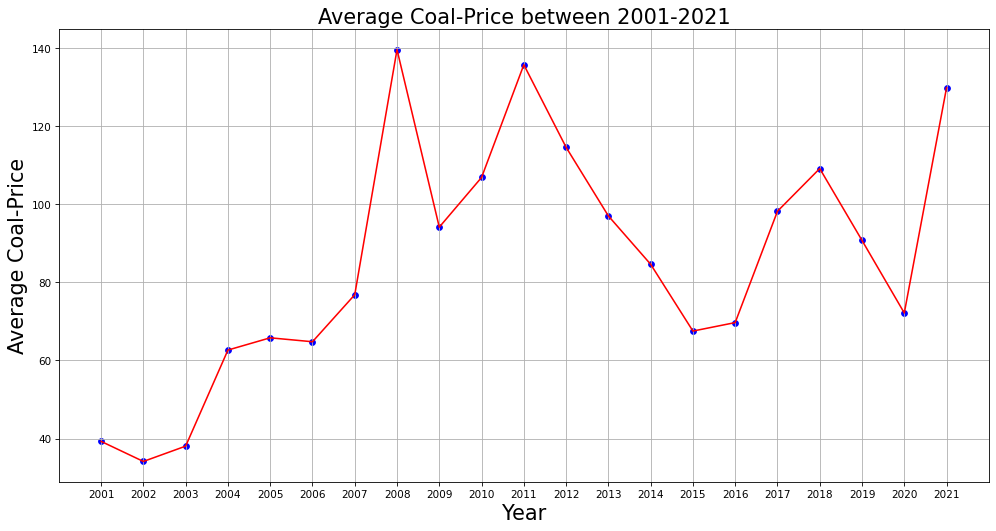

In [118]:
plt.figure(figsize=(16, 8), dpi=75)

plt.scatter(x=df_year.Year, y=df_year['Coal-Prices'], color='b', s=30)
plt.plot(df_year.Year, df_year['Coal-Prices'], color='r')
plt.xticks(np.arange(2001,2022, 1))
plt.xlabel('Year', size=20)
plt.ylabel('Average Coal-Price', size=20)
plt.title('Average Coal-Price between 2001-2021', size=20)
plt.grid()

plt.show()

The plot above shows an overall increase in coal price between the years 2001 and 2021. There are 2 massives jumps in price for th years 2008 and 2021, which are likely due to the 2008 recession and the recent Covid-19 pandemic, respectively. 

While this plot shows the overall price among the 7 entities, the plots for each unique entity may have a slightly different appearance. In particular, I predict that the plots for the entites located in Japan will have a more pronounced hike in coal-price for the year 2011, due to the Tohoku tsunami disaster that took place that year. 

I also predict a slightly lower hike in coal price for the entities located in Europe and the USA for 2020-2021. This is due to the fact that both regions have a longer distance from China, than the distance between China and Japan. The longer distance could have a positive affect on a faster recovery from the COvid-19 pandemic, which originated in China.

## Data per individual Entities ##

Below are plots showing the coal prices for each individual enitity over the 20 year period. I created 2 functions to track the data:
1. **graph_maker()** will output a single plot of the titled entity's prices over time along with prospective prices through 2031 (10 years over the avaliable data)
1. **multi_plot()** will output a sinlge plot comparing the prices between the specific entity and the overall average

In [119]:
def graph_maker(dataf):
    plt.figure(figsize=(16, 8), dpi=75)
    plt.scatter(x=dataf.Year, y=dataf['Coal-Prices'], color= 'r', s=20)
    plt.plot(dataf.Year, dataf['Coal-Prices'], color='b')
    
    slope, intercept, rval, pval, std_err = linregress(x=dataf.Year, y=dataf['Coal-Prices'])
    p_years = list(range(2001,2032))
    pred_line = [slope*i + intercept for i in p_years]
    plt.plot(p_years, pred_line, color='k', linewidth=1)
    
    plt.xticks(np.arange(2001,2032, 1))
    plt.xlabel('Year', size=20)
    plt.ylabel('Coal-Price', size=20)
    plt.grid()
    
    return plt.gca(), (slope*p_years[-1] + intercept) #returns the plot and the predicted price at 2031


def multi_plot(dataf):
    xaxis = np.arange(2001,2022,1)
    
    plt.figure(figsize=(16, 8), dpi=75)
    
    #plot the specific entity's data
    plt.scatter(x=dataf.Year, y=dataf['Coal-Prices'], s=30, color='b')
    plt.plot(dataf.Year, dataf['Coal-Prices'], color='b', label=dataf._get_value(0,'Entity'))
    
    #plot the overall average data
    plt.scatter(x=df_year.Year, y=df_year['Coal-Prices'], s=30, color='r')
    plt.plot(df_year.Year, df_year['Coal-Prices'], color='r', label='Overall Average')
    
    plt.xticks(xaxis)
    plt.xlabel('Year', size=20)
    plt.ylabel('Coal-Price', size=20)
    plt.grid()
    plt.legend()
    
    return plt.gca()

Plot all the above graphs onto the same. Also, create an overall line-of-best fit through 2030.

### Asian marker ###

At year 2031, the predicted coal price will be: 140.43192 USD per tonne.


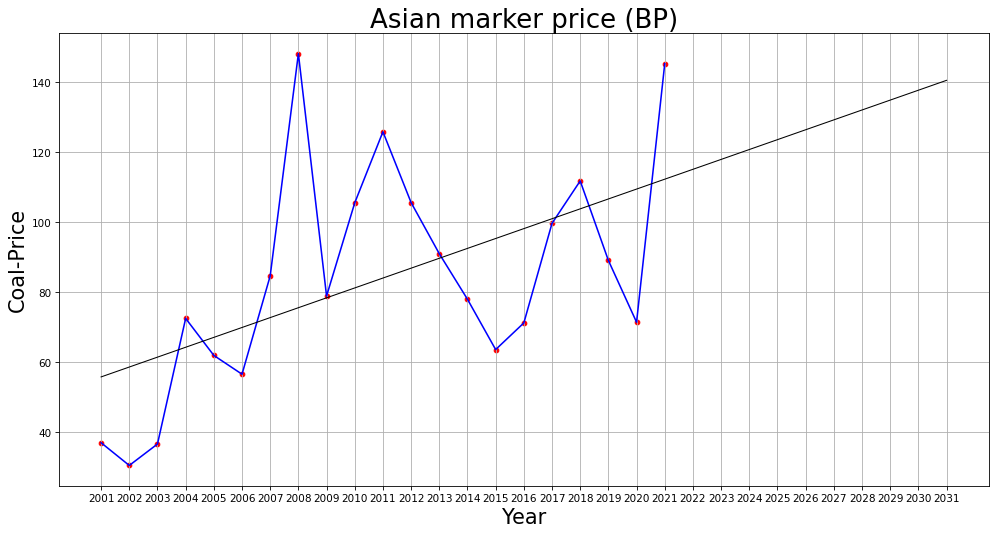

In [120]:
dfAsian = df.loc[df['Entity'] == 'Asian marker price (BP)']
AsianMP = graph_maker(dfAsian)
plt.title("Asian marker price (BP)", size=25)

print("At year 2031, the predicted coal price will be:", round(AsianMP[-1], 5), "USD per tonne.")

Text(0.5, 1.0, 'Asian marker price VS. Overall Average')

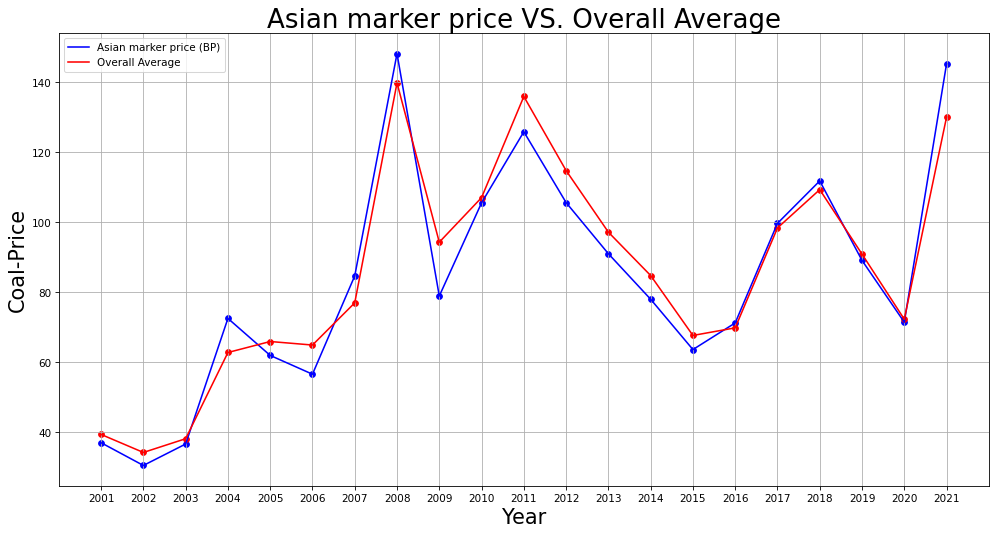

In [121]:
multi_plot(dfAsian)
plt.title("Asian marker price VS. Overall Average", size=25)

It appears that the **Asian marker price** follows the Overall Average price patterns and does not deviate too much.

### China Qinhuangdao spot  ###

At year 2031, the predicted coal price will be: 153.52621 USD per tonne.


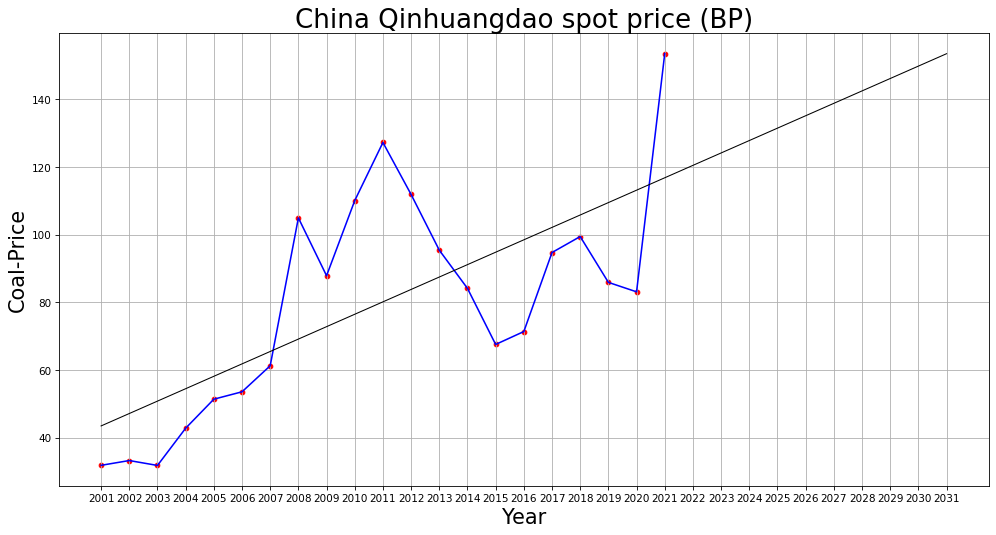

In [122]:
dfChina= df.loc[df['Entity'] == 'China Qinhuangdao spot price (BP)'].reset_index()
ChinaQ = graph_maker(dfChina)
plt.title("China Qinhuangdao spot price (BP)", size=25)

print("At year 2031, the predicted coal price will be:", round(ChinaQ[-1], 5), "USD per tonne.")

Text(0.5, 1.0, 'China Qinhuangdao spot price VS. Overall Average')

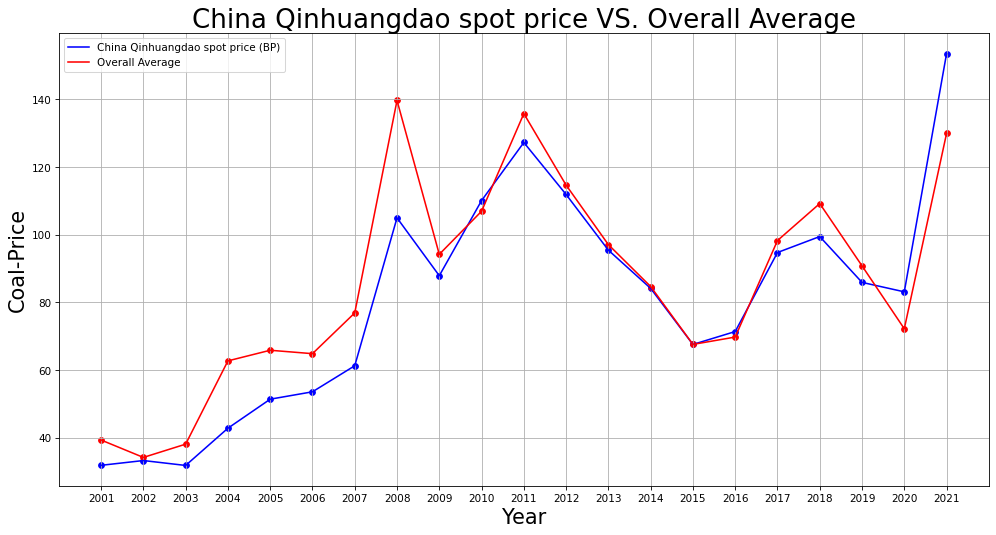

In [123]:
multi_plot(dfChina)
plt.title("China Qinhuangdao spot price VS. Overall Average", size=25)

With the exception of 2020 and 2021, the **China coal** price has been lower than, or just about the same as, the average. The rising of coal prices in 2020-2021 are likely due to the Covid-19 pandemic, which originated in China.

### Japan coking coal import CIF  ###

At year 2031, the predicted coal price will be: 203.74845 USD per tonne.


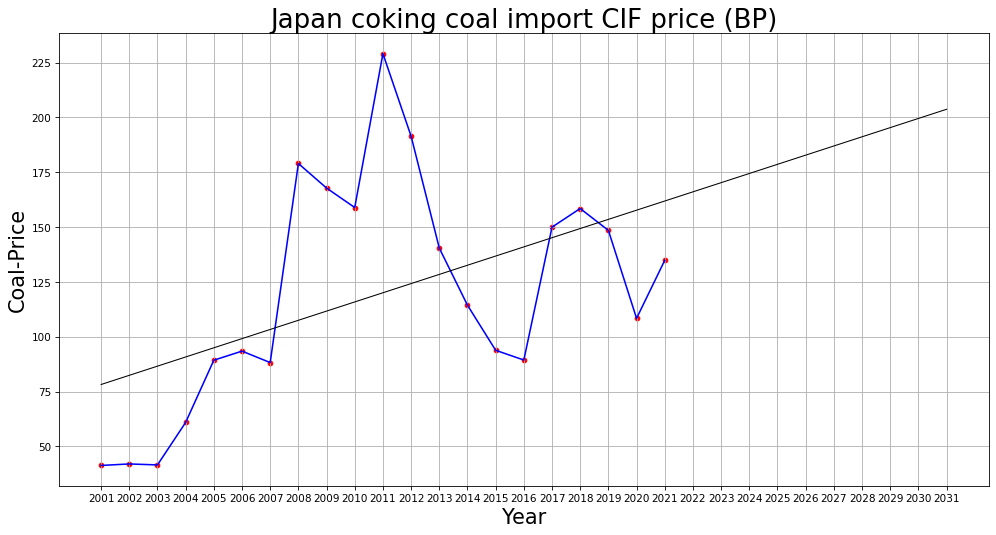

In [124]:
dfJPcc = df.loc[df['Entity'] == 'Japan coking coal import CIF price (BP)'].reset_index()
JPcoco = graph_maker(dfJPcc)
plt.title("Japan coking coal import CIF price (BP)", size=25)

print("At year 2031, the predicted coal price will be:", round(JPcoco[-1], 5), "USD per tonne.")

Text(0.5, 1.0, 'Japan coking coal import CIF price (BP) VS. Overall Average')

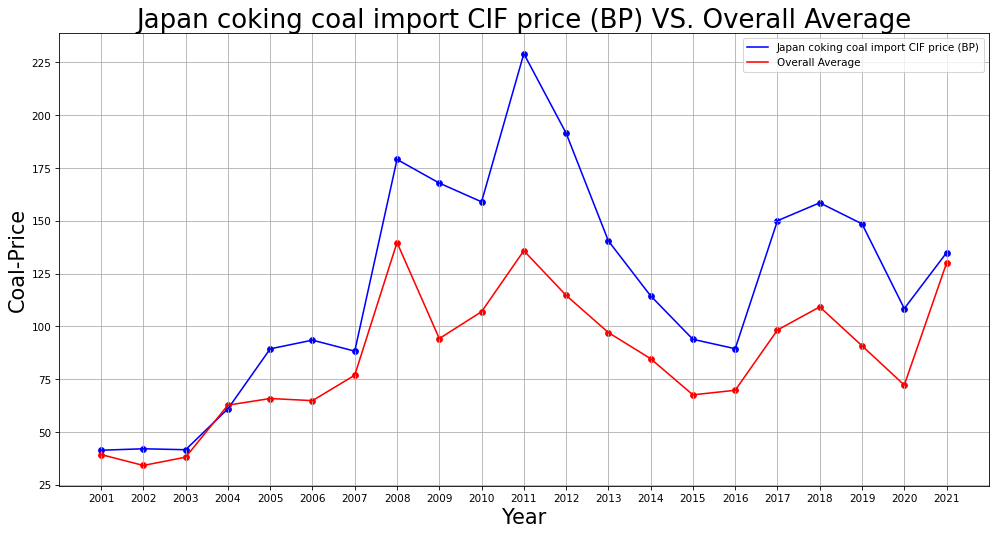

In [125]:
multi_plot(dfJPcc)
plt.title("Japan coking coal import CIF price (BP) VS. Overall Average", size=25)

The price of **Japan coking coal** has been consistently higher than the average since 2005. There is also an almost twice as higher increase in price in 2011 compared to the average, which I believe could be attributed to the 2011 Tohoku tsunami disaster.

### Japan steam coal import CIF ###

At year 2031, the predicted coal price will be: 156.98014 USD per tonne.


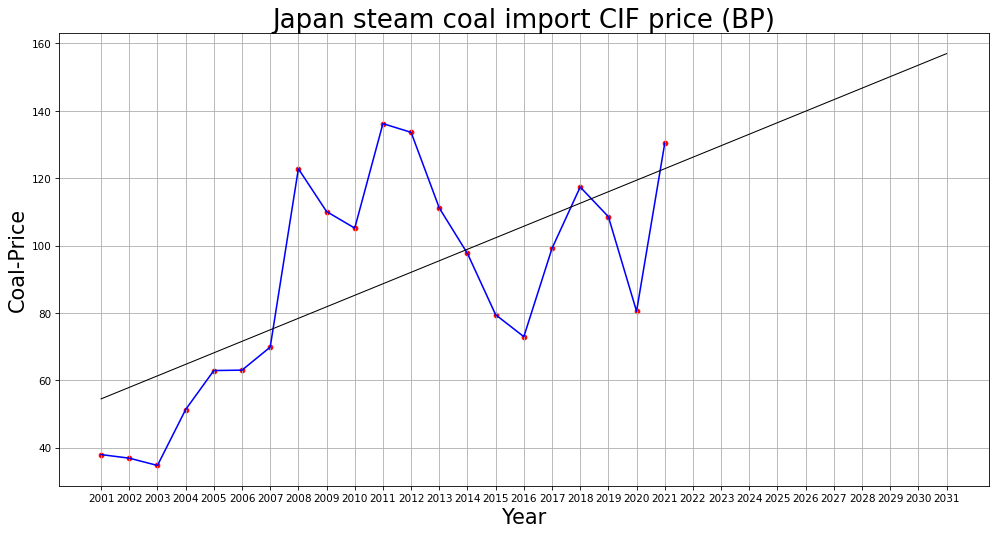

In [126]:
dfJPsc = df.loc[df['Entity'] == 'Japan steam coal import CIF price (BP)'].reset_index()
JPstcoal = graph_maker(dfJPsc)
plt.title("Japan steam coal import CIF price (BP)", size=25)

print("At year 2031, the predicted coal price will be:", round(JPstcoal[-1], 5), "USD per tonne.")

Text(0.5, 1.0, 'Japan steam coal import CIF price (BP) VS. Overall Average')

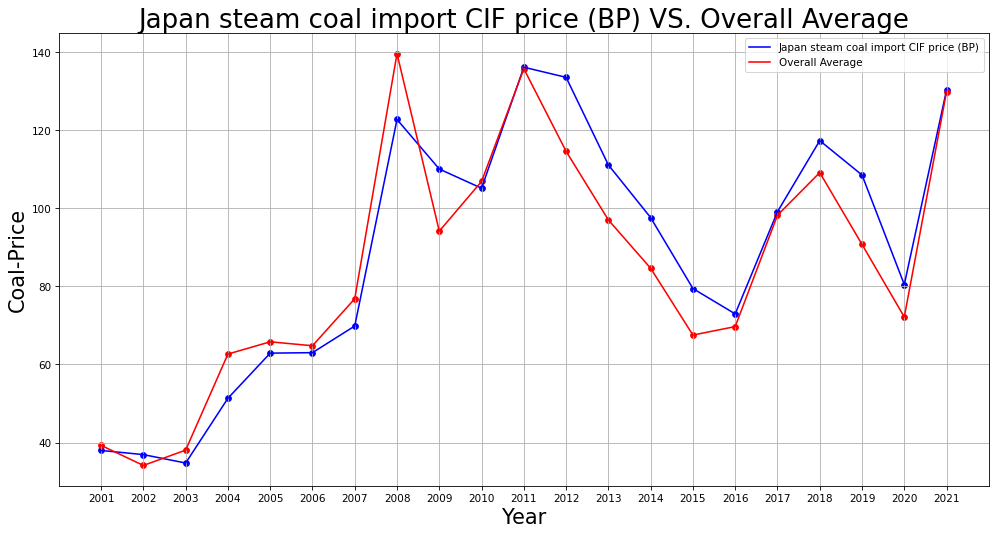

In [127]:
multi_plot(dfJPsc)
plt.title("Japan steam coal import CIF price (BP) VS. Overall Average", size=25)

Unlike the price of *Japan coking coal*, the **Japan steam coal** prices have been more in-tune with the average. Surprisingly, the increase in price between 2010-2011 is almost identical to the trend in the overall average, however the price did not decline as strongly compared to the average, and has stayed consistently higher since.

### Japan steam spot CIF ###

At year 2031, the predicted coal price will be: 137.46117 USD per tonne.


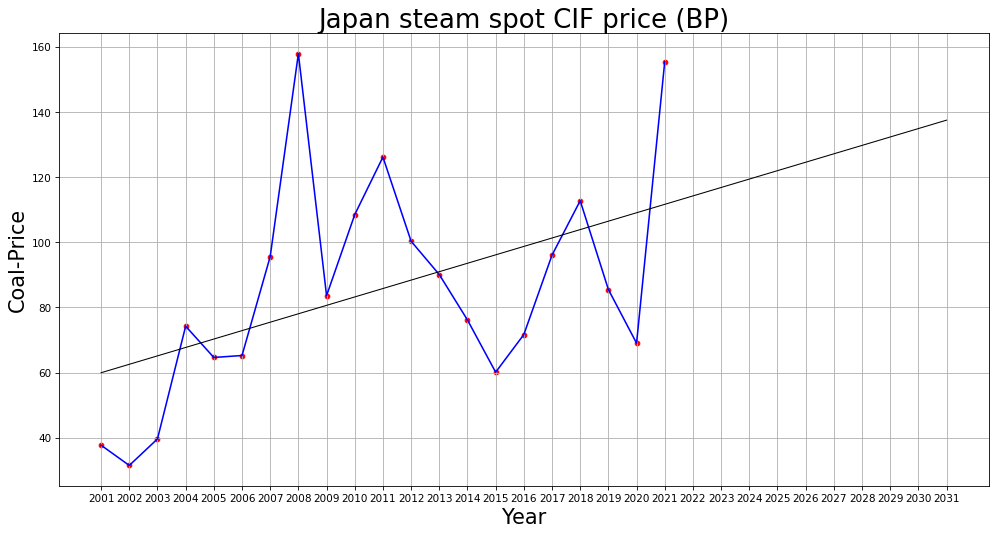

In [128]:
dfJPss = df.loc[df['Entity'] == 'Japan steam spot CIF price (BP)'].reset_index()
JPstspot = graph_maker(dfJPss)
plt.title("Japan steam spot CIF price (BP)", size=25)

print("At year 2031, the predicted coal price will be:", round(JPstspot[-1], 5), "USD per tonne.")

Text(0.5, 1.0, 'Japan steam spot CIF price (BP) VS. Overall Average')

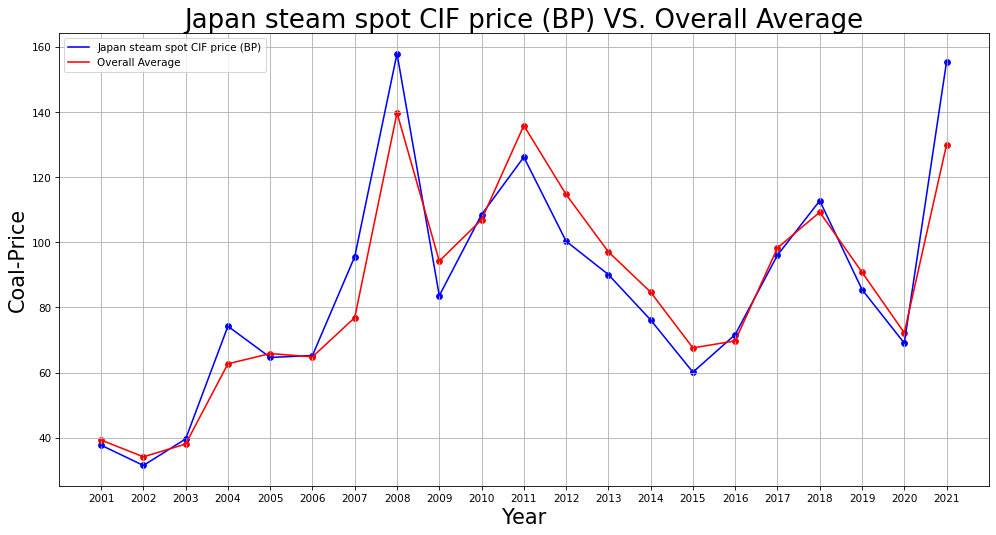

In [129]:
multi_plot(dfJPss)
plt.title("Japan steam spot CIF price (BP) VS. Overall Average", size=25)

It appears that my prediction that the 2011 tsunami would have a significant effect on coal prices is again not supported. Similar to the trend shown by the *Japan steam coal*, the coal price of **Japan steam spot** has also been relatively close with the average trend.

### Northwest Europe marker price ###

At year 2031, the predicted coal price will be: 104.35224 USD per tonne.


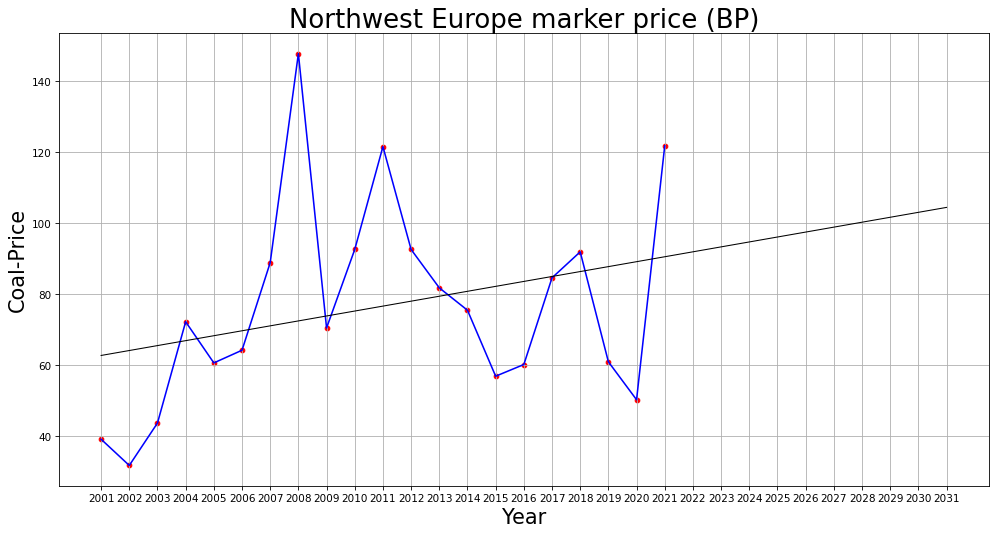

In [130]:
dfNE = df.loc[df['Entity'] == 'Northwest Europe marker price (BP)'].reset_index()
nwEuro = graph_maker(dfNE)
plt.title("Northwest Europe marker price (BP)", size=25)

print("At year 2031, the predicted coal price will be:", round(nwEuro[-1], 5), "USD per tonne.")

Text(0.5, 1.0, 'Northwest Europe marker price (BP) VS. Overall Average')

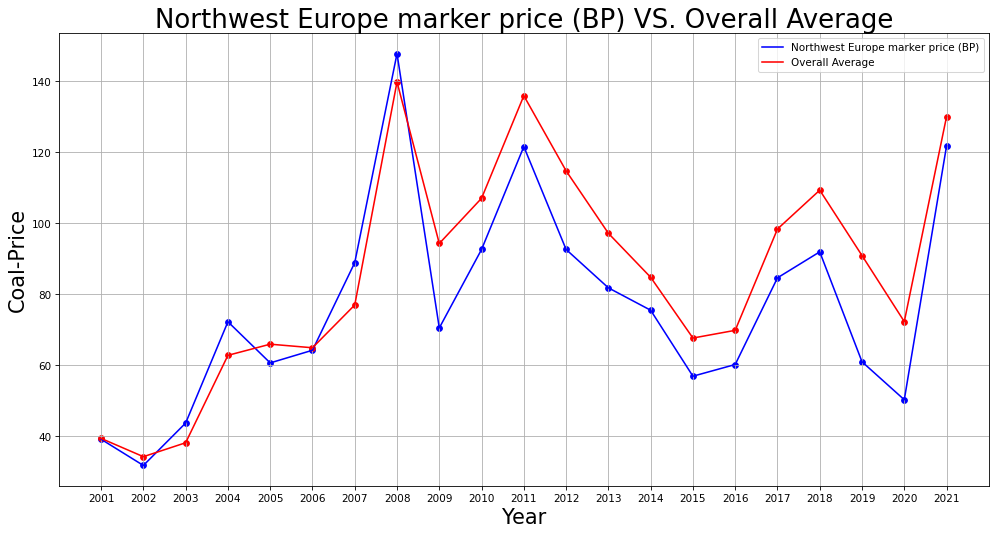

In [131]:
multi_plot(dfNE)
plt.title("Northwest Europe marker price (BP) VS. Overall Average", size=25)

### US Central Appalachian coal spot ###

The **Northwest Europe** coal price has been lower than the average for most of the data.

At year 2031, the predicted coal price will be: 69.50063 USD per tonne.


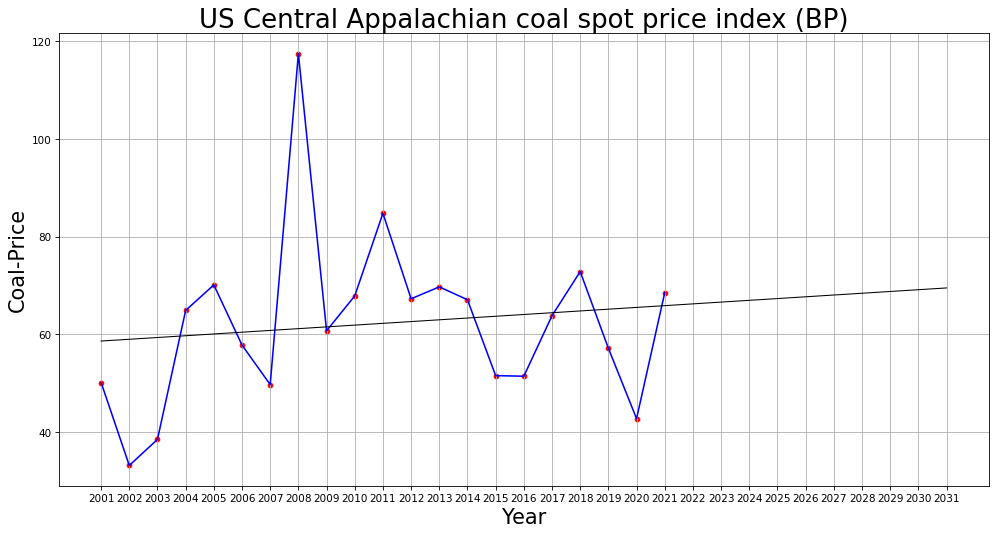

In [132]:
dfUS= df.loc[df['Entity'] == 'US Central Appalachian coal spot price index (BP)'].reset_index()
USCA = graph_maker(dfUS)
plt.title("US Central Appalachian coal spot price index (BP)", size=25)

print("At year 2031, the predicted coal price will be:", round(USCA[-1], 5), "USD per tonne.")

Text(0.5, 1.0, 'US Central Appalachian coal spot price index (BP) VS. Overall Average')

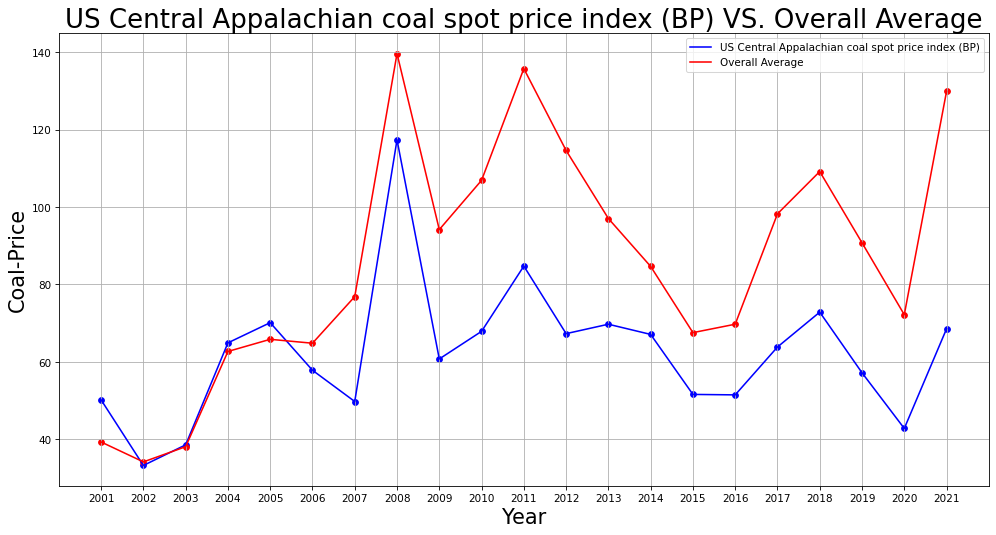

In [133]:
multi_plot(dfUS)
plt.title("US Central Appalachian coal spot price index (BP) VS. Overall Average", size=25)

The difference in price data between **US Central** and the average is almost comical. While I was aware that the Appalachian mountains is known for its coal mines, I am still suprised by how low the coal price from this region is compared to the BP average. Like I suggested, the increase in coal price for 2021 was not as pronounced compared to the other regions, but still somewhat follows the trend. 

## Review and Conclusions ##

Looking back at my predictions regarding plot patterns,it appears that I overestimated the effect that the 2011 tsunami would have regarding coal production. I suppose that I saw the hike in coal prices in 2011 and theorized that because 3 out of the 7 entites were from Japan, then the Japan-specific disaster was the cause. However, it does appear that the *Japan coking coal* prices were the reason of the huge spike.

Using linear regression, I was able to plot a line-of-best-fit to predict the direction of future prices. It appears that the entity that will produce the most expensive coal at 2031 will be *Japan coking coal* at ~203.74845 USD per tonne, while the entity with the lowest price at 2031 will be *US Central Appalachian coal* at ~69.50063 USD per tonne.

Lastly, just for fun, below is a plot showing all the individual price data per entity over time.

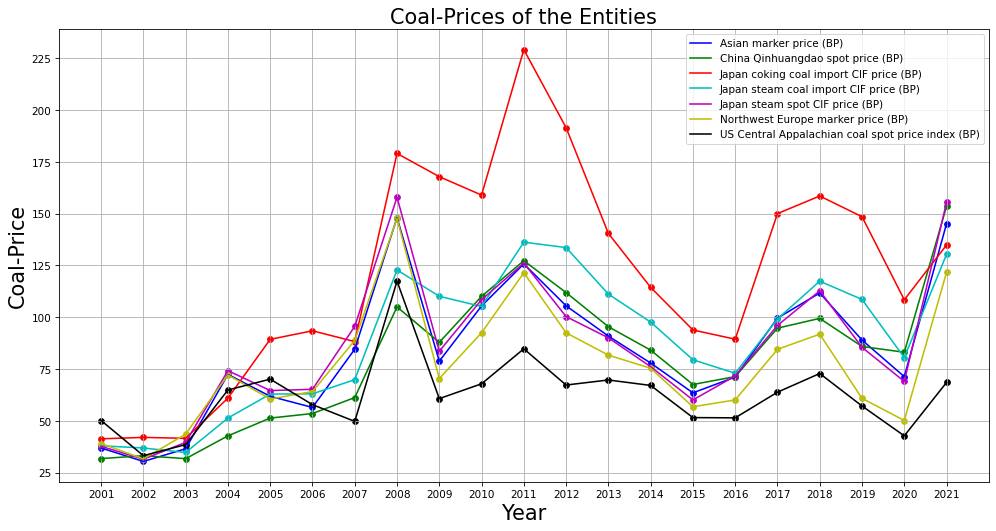

In [134]:
xaxis = np.arange(2001,2022,1)
plt.figure(figsize=(16, 8), dpi=75)
    
#Asian marker price = blue
plt.scatter(x=dfAsian.Year, y=dfAsian['Coal-Prices'], s=30, color='b')
plt.plot(dfAsian.Year, dfAsian['Coal-Prices'], color='b', label=dfAsian._get_value(0,'Entity'))

#China Qinhuangdao spot price = green
plt.scatter(x=dfChina.Year, y=dfChina['Coal-Prices'], s=30, color='g')
plt.plot(dfChina.Year, dfChina['Coal-Prices'], color='g', label=dfChina._get_value(0,'Entity'))

#Japan coking coal import CIF price = red
plt.scatter(x=dfJPcc.Year, y=dfJPcc['Coal-Prices'], s=30, color='r')
plt.plot(dfJPcc.Year, dfJPcc['Coal-Prices'], color='r', label=dfJPcc._get_value(0,'Entity'))

#Japan steam coal import CIF price = cyan
plt.scatter(x=dfJPsc.Year, y=dfJPsc['Coal-Prices'], s=30, color='c')
plt.plot(dfJPsc.Year, dfJPsc['Coal-Prices'], color='c', label=dfJPsc._get_value(0,'Entity'))

#Japan steam spot CIF price = magenta
plt.scatter(x=dfJPss.Year, y=dfJPss['Coal-Prices'], s=30, color='m')
plt.plot(dfJPss.Year, dfJPss['Coal-Prices'], color='m', label=dfJPss._get_value(0,'Entity'))

#Northwest Europe marker price = yellow
plt.scatter(x=dfNE.Year, y=dfNE['Coal-Prices'], s=30, color='y')
plt.plot(dfNE.Year, dfNE['Coal-Prices'], color='y', label=dfNE._get_value(0,'Entity'))

#US Central Appalachian coal spot price index = black
plt.scatter(x=dfUS.Year, y=dfUS['Coal-Prices'], s=30, color='k')
plt.plot(dfUS.Year, dfUS['Coal-Prices'], color='k', label=dfUS._get_value(0,'Entity'))

plt.xticks(xaxis)
plt.xlabel('Year', size=20)
plt.ylabel('Coal-Price', size=20)
plt.title('Coal-Prices of the Entities', size=20)
plt.grid()
plt.legend()